In [18]:
import numpy as np
import pickle as pkl
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from itertools import product
from datetime import datetime
import pickle as pkl
import matplotlib.pyplot as plt
import os
import pandas as pd


In [25]:
with open("gs_nr_300_600_2020230722-103548.pkl", "rb") as f:
    res_log = pkl.load(f)

res_log

[{'parameters': {'n': 300,
   'p': 600,
   'm': 20,
   'noise_level_lst': [0.12],
   'model_name': 'BOMP',
   'cv_num': 5,
   'trial_num': 15,
   'param_grid': {'K': array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
            27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
            53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
            79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
           105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
           131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
           157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179])},
   'fixed_params': {'N_bag': 500,
    'signal_bag_percent': 0.8,
    'atom_bag_percent': 0.9,
    'select_atom_percent': 0,
    'replace_flag': False,
    'agg_func': 'weight',
    'ignore_warning': True,
    'random_seed': 1}},
  'noise_level_lowest_cv_MSE': [0.02007878540236682],
  'trials_testing_score':

In [26]:
res_log = res_log[0]

In [27]:
params = res_log["parameters"]
log = res_log["log"]

In [28]:
params

{'n': 300,
 'p': 600,
 'm': 20,
 'noise_level_lst': [0.12],
 'model_name': 'BOMP',
 'cv_num': 5,
 'trial_num': 15,
 'param_grid': {'K': array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
          27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
          53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
          79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
         105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
         131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
         157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179])},
 'fixed_params': {'N_bag': 500,
  'signal_bag_percent': 0.8,
  'atom_bag_percent': 0.9,
  'select_atom_percent': 0,
  'replace_flag': False,
  'agg_func': 'weight',
  'ignore_warning': True,
  'random_seed': 1}}

In [29]:
K_lst = params["param_grid"]['K']

In [30]:
K_lst

array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179])

In [31]:
cv_results_lst = []
for i in range(len(log)):
    cv_results_lst.append(log[i]["cv_error_lst"])

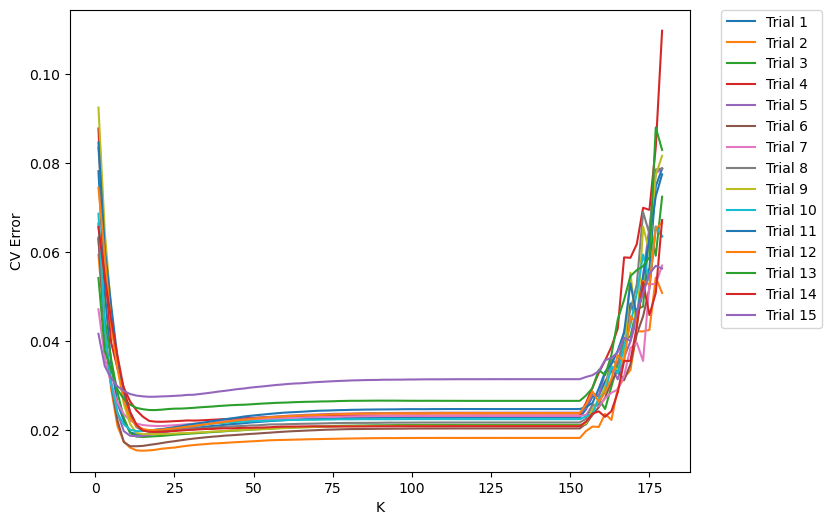

In [33]:
plt.subplots(figsize=(8, 6))
for i in range(len(cv_results_lst)):
    plt.plot(K_lst, cv_results_lst[i], label="Trial {}".format(i+1))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("K")
plt.ylabel("CV Error")
plt.show()


In [35]:
# avg best K

avg_best_K = np.mean([log[i]["best_params"]["K"] for i in range(len(log))])
print("Avg best K: ", avg_best_K)

Avg best K:  16.733333333333334


In [3]:
# omp baseline

with open("omp_baseline.pkl", "rb") as f:
    omp_baseline = pkl.load(f)

In [10]:
omp_baeline_noise_levels = omp_baseline['parameters']['noise_level_lst']
omp_baseline.keys()

dict_keys(['parameters', 'noise_level_best_K', 'noise_level_lowest_MSE', 'noise_level_testing_score', 'noise_level_training_score', 'log'])

In [14]:
# bomp results

with open("gs_nr_300_600_20_08_09_AN20230722-215434.pkl", "rb") as f:
    bomp_results_0809 = pkl.load(f)
    
with open("gs_nr_300_600_20_09_09_AN20230722-215434.pkl", "rb") as f:
    bomp_results_0909 = pkl.load(f)
    
with open("gs_nr_300_600_20_09_10_AN20230722-215423.pkl", "rb") as f:
    bomp_results_0910 = pkl.load(f)
    
bomp_results_0809 = bomp_results_0809[0]
bomp_results_0909 = bomp_results_0909[0]
bomp_results_0910 = bomp_results_0910[0]

In [15]:
bomp_noise_lst = bomp_results_0809["parameters"]["noise_level_lst"]

In [21]:
bomp_results_0809.keys()

dict_keys(['parameters', 'noise_level_lowest_cv_MSE', 'trials_testing_score', 'trials_training_score', 'log'])

In [20]:
# put them all into a dataframe

df_omp_results = pd.DataFrame({"noise_level": omp_baeline_noise_levels, 
                            'Lowest CV Error': omp_baseline['noise_level_lowest_MSE'],
                            'Training Error': omp_baseline['noise_level_training_score'],
                            'Test Error': omp_baseline['noise_level_testing_score']})
df_omp_results

,noise_level,Lowest CV Error,Training Error,Test Error
0,0.00,4.417992e-31,2.304991e-32,2.690515e-32
1,0.02,5.852328e-04,4.252840e-04,6.055134e-04
2,0.04,2.214866e-03,1.772826e-03,2.331478e-03
3,0.06,4.847163e-03,4.243724e-03,5.792682e-03
4,0.08,8.383112e-03,8.237686e-03,1.144215e-02
5,0.10,1.298915e-02,1.129934e-02,1.625904e-02
6,0.12,1.843764e-02,1.590569e-02,2.219366e-02
7,0.14,2.468836e-02,1.999340e-02,3.044127e-02
8,0.16,3.216920e-02,2.822779e-02,4.005111e-02
9,0.18,4.053991e-02,3.544717e-02,5.050155e-02


In [23]:
df_bomp_results_0809 = pd.DataFrame({"noise_level": bomp_noise_lst, 
                            'Lowest CV Error': bomp_results_0809['noise_level_lowest_cv_MSE'],
                            'Training Error': bomp_results_0809['trials_training_score'],
                            'Test Error': bomp_results_0809['trials_testing_score']})
df_bomp_results_0809

,noise_level,Lowest CV Error,Training Error,Test Error
0,0.00,7.834699e-33,7.524384e-33,8.674822e-33
1,0.02,5.145694e-04,3.595899e-04,4.843353e-04
2,0.04,2.065406e-03,1.370588e-03,1.928220e-03
3,0.06,4.696208e-03,3.015897e-03,4.314269e-03
4,0.08,8.587442e-03,5.052764e-03,7.689998e-03
5,0.10,1.372665e-02,8.052722e-03,1.213188e-02
6,0.12,2.007879e-02,1.113035e-02,1.754214e-02
7,0.14,2.754230e-02,1.501718e-02,2.387622e-02
8,0.16,3.620716e-02,2.036985e-02,3.115113e-02
9,0.18,4.586762e-02,2.529981e-02,4.012216e-02


In [24]:
df_bomp_results_0909 = pd.DataFrame({"noise_level": bomp_noise_lst, 
                            'Lowest CV Error': bomp_results_0909['noise_level_lowest_cv_MSE'],
                            'Training Error': bomp_results_0909['trials_training_score'],
                            'Test Error': bomp_results_0909['trials_testing_score']})
df_bomp_results_0909

,noise_level,Lowest CV Error,Training Error,Test Error
0,0.00,7.788407e-33,8.637742e-33,1.069255e-32
1,0.02,5.129782e-04,3.669649e-04,4.870112e-04
2,0.04,2.044704e-03,1.376589e-03,1.929134e-03
3,0.06,4.613351e-03,3.094291e-03,4.302835e-03
4,0.08,8.373928e-03,5.308653e-03,7.643956e-03
5,0.10,1.336095e-02,8.385822e-03,1.202700e-02
6,0.12,1.964814e-02,1.224620e-02,1.739327e-02
7,0.14,2.711084e-02,1.709819e-02,2.338664e-02
8,0.16,3.568859e-02,2.245877e-02,3.120623e-02
9,0.18,4.548744e-02,2.901635e-02,3.989562e-02


In [25]:
df_bomp_results_0910 = pd.DataFrame({"noise_level": bomp_noise_lst, 
                            'Lowest CV Error': bomp_results_0910['noise_level_lowest_cv_MSE'],
                            'Training Error': bomp_results_0910['trials_training_score'],
                            'Test Error': bomp_results_0910['trials_testing_score']})
df_bomp_results_0910

,noise_level,Lowest CV Error,Training Error,Test Error
0,0.00,2.315274e-32,3.854238e-32,4.423476e-32
1,0.02,4.708770e-04,3.722384e-04,4.558246e-04
2,0.04,1.886085e-03,1.469188e-03,1.816964e-03
3,0.06,4.297995e-03,3.409087e-03,4.114449e-03
4,0.08,7.938576e-03,5.739913e-03,7.367519e-03
5,0.10,1.280949e-02,9.158320e-03,1.168068e-02
6,0.12,1.921382e-02,1.344718e-02,1.711002e-02
7,0.14,2.684404e-02,1.834934e-02,2.300667e-02
8,0.16,3.565997e-02,2.489422e-02,3.143617e-02
9,0.18,4.579425e-02,3.162616e-02,4.040456e-02


In [48]:
df_merged = pd.merge(df_omp_results, df_bomp_results_0809, on="noise_level", suffixes=("", "_bomp_0809"), how='inner')
df_merged

,noise_level,Lowest CV Error,Training Error,Test Error,Lowest CV Error_bomp_0809,Training Error_bomp_0809,Test Error_bomp_0809
0,0.00,4.417992e-31,2.304991e-32,2.690515e-32,7.834699e-33,7.524384e-33,8.674822e-33
1,0.02,5.852328e-04,4.252840e-04,6.055134e-04,5.145694e-04,3.595899e-04,4.843353e-04
2,0.04,2.214866e-03,1.772826e-03,2.331478e-03,2.065406e-03,1.370588e-03,1.928220e-03
3,0.06,4.847163e-03,4.243724e-03,5.792682e-03,4.696208e-03,3.015897e-03,4.314269e-03
4,0.08,8.383112e-03,8.237686e-03,1.144215e-02,8.587442e-03,5.052764e-03,7.689998e-03
5,0.10,1.298915e-02,1.129934e-02,1.625904e-02,1.372665e-02,8.052722e-03,1.213188e-02
6,0.12,1.843764e-02,1.590569e-02,2.219366e-02,2.007879e-02,1.113035e-02,1.754214e-02
7,0.14,2.468836e-02,1.999340e-02,3.044127e-02,2.754230e-02,1.501718e-02,2.387622e-02
8,0.16,3.216920e-02,2.822779e-02,4.005111e-02,3.620716e-02,2.036985e-02,3.115113e-02
9,0.18,4.053991e-02,3.544717e-02,5.050155e-02,4.586762e-02,2.529981e-02,4.012216e-02


In [50]:
df_full = pd.merge(df_merged, df_bomp_results_0909, on="noise_level", suffixes=("", "_bomp_0909"), how='inner')
df_full = pd.merge(df_full, df_bomp_results_0910, on="noise_level", suffixes=("", "_bomp_0910"), how='inner')
df_full.columns = ['noise_level', 'Lowest CV Error_omp', 'Training Error_omp', 'Test Error_omp', 'Lowest CV Error_bomp_0809', 'Training Error_bomp_0809', 'Test Error_bomp_0809', 'Lowest CV Error_bomp_0909', 'Training Error_bomp_0909', 'Test Error_bomp_0909', 'Lowest CV Error_bomp_0910', 'Training Error_bomp_0910', 'Test Error_bomp_0910']

In [52]:
df_full_testing = df_full[['noise_level', 'Test Error_omp', 'Test Error_bomp_0809', 'Test Error_bomp_0909', 'Test Error_bomp_0910']]
df_full_testing

,noise_level,Test Error_omp,Test Error_bomp_0809,Test Error_bomp_0909,Test Error_bomp_0910
0,0.00,2.690515e-32,8.674822e-33,1.069255e-32,4.423476e-32
1,0.02,6.055134e-04,4.843353e-04,4.870112e-04,4.558246e-04
2,0.04,2.331478e-03,1.928220e-03,1.929134e-03,1.816964e-03
3,0.06,5.792682e-03,4.314269e-03,4.302835e-03,4.114449e-03
4,0.08,1.144215e-02,7.689998e-03,7.643956e-03,7.367519e-03
5,0.10,1.625904e-02,1.213188e-02,1.202700e-02,1.168068e-02
6,0.12,2.219366e-02,1.754214e-02,1.739327e-02,1.711002e-02
7,0.14,3.044127e-02,2.387622e-02,2.338664e-02,2.300667e-02
8,0.16,4.005111e-02,3.115113e-02,3.120623e-02,3.143617e-02
9,0.18,5.050155e-02,4.012216e-02,3.989562e-02,4.040456e-02


In [60]:
df_full_testing_round = df_full_testing.round(5)
df_full_testing_round.style.highlight_min(color = 'green', axis = 1)

,noise_level,Test Error_omp,Test Error_bomp_0809,Test Error_bomp_0909,Test Error_bomp_0910
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.020000,0.000610,0.000480,0.000490,0.000460
2,0.040000,0.002330,0.001930,0.001930,0.001820
3,0.060000,0.005790,0.004310,0.004300,0.004110
4,0.080000,0.011440,0.007690,0.007640,0.007370
5,0.100000,0.016260,0.012130,0.012030,0.011680
6,0.120000,0.022190,0.017540,0.017390,0.017110
7,0.140000,0.030440,0.023880,0.023390,0.023010
8,0.160000,0.040050,0.031150,0.031210,0.031440
9,0.180000,0.050500,0.040120,0.039900,0.040400


In [75]:
bomp_results_0809['parameters']['fixed_params']

{'N_bag': 500,
 'signal_bag_percent': 0.8,
 'atom_bag_percent': 0.9,
 'select_atom_percent': 0,
 'replace_flag': False,
 'agg_func': 'weight',
 'ignore_warning': True,
 'random_seed': 1}

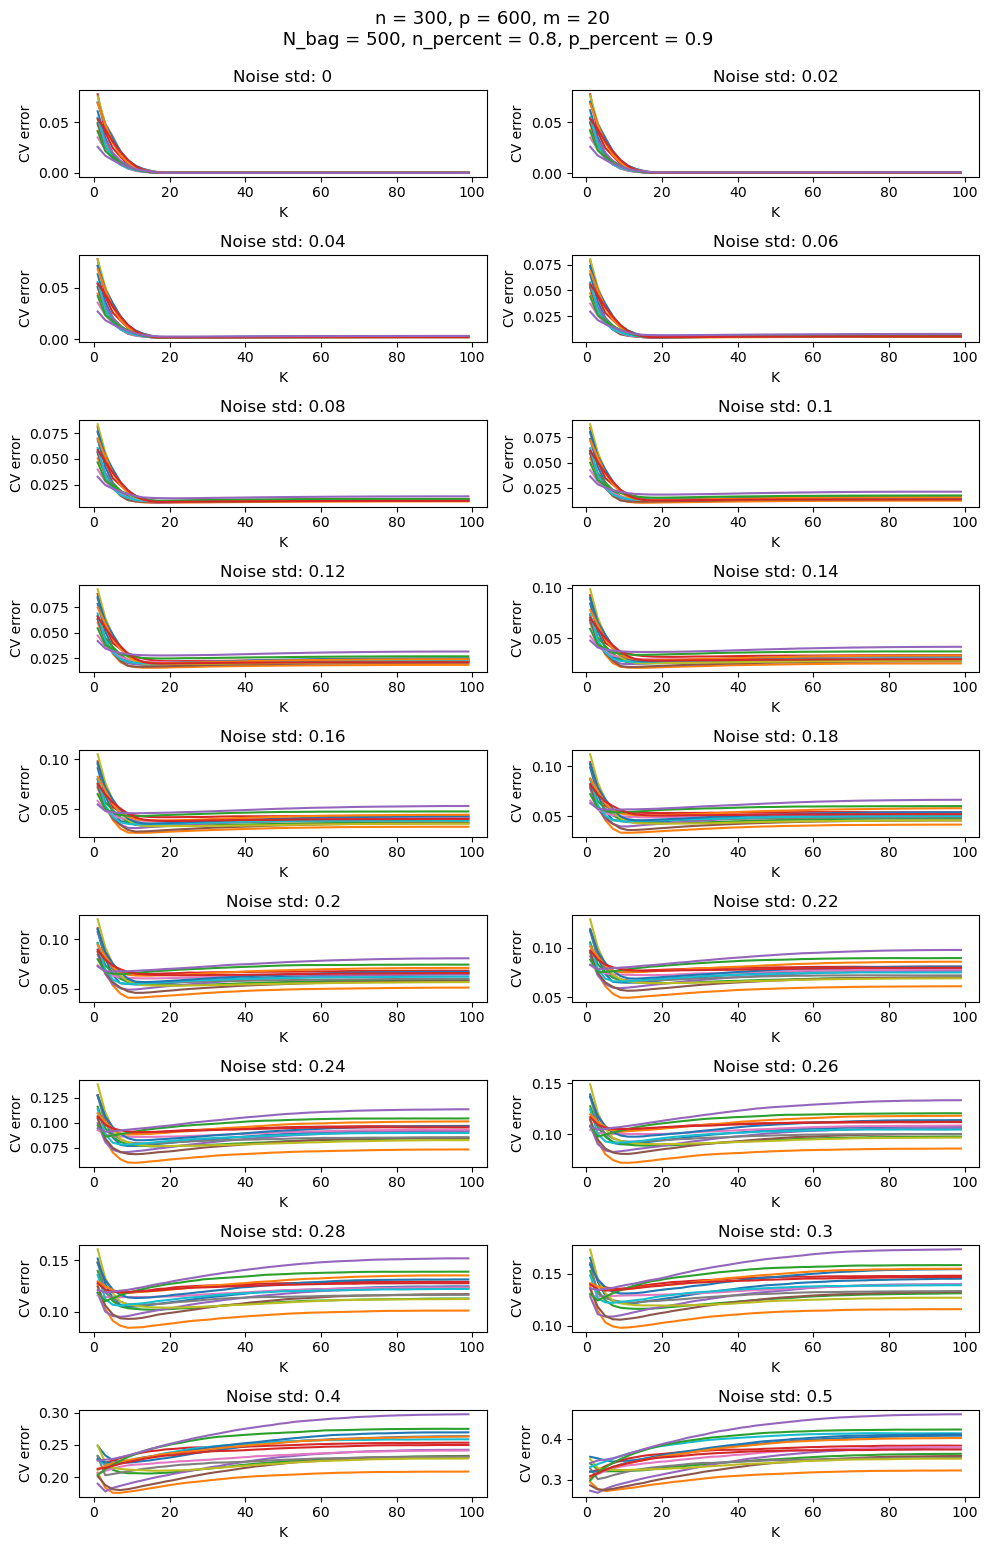

In [81]:
def plot_K_error_all_noise(res_log, col_num = 2, figsize = (10, 12)):
    noise_level_lst = res_log["parameters"]["noise_level_lst"]
    trial_num = res_log["parameters"]["trial_num"]
    K_lst = res_log["parameters"]["param_grid"]["K"]
    fig, ax = plt.subplots(len(noise_level_lst) // col_num, col_num, figsize = figsize)
    for i, noise_level in enumerate(noise_level_lst):
        row = int(i // col_num)
        column = i % col_num
        for j in range(trial_num):
            ax[row, column].plot(K_lst, res_log['log'][i * trial_num + j]['cv_error_lst'])
        ax[row, column].set_xlabel("K")
        ax[row, column].set_ylabel("CV error")
        ax[row, column].set_title("Noise std: " + str(noise_level))  
    plt.tight_layout()
    fixed_params = res_log['parameters']['fixed_params']
    fig.suptitle(f"n = {res_log['parameters']['n']}, p = {res_log['parameters']['p']}, m = {res_log['parameters']['m']} \n N_bag = {fixed_params['N_bag']}, n_percent = {fixed_params['signal_bag_percent']}, p_percent = {fixed_params['atom_bag_percent']}", fontsize=13, y = 1.03)
    
plot_K_error_all_noise(bomp_results_0809, col_num = 2, figsize = (10, 15))

{'N_bag': 500,
 'signal_bag_percent': 0.8,
 'atom_bag_percent': 0.9,
 'select_atom_percent': 0,
 'replace_flag': False,
 'agg_func': 'weight',
 'ignore_warning': True,
 'random_seed': 1}